# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import time
from scipy import stats as st
from scipy.stats import linregress

from citipy import citipy
from api_keys import weather_api_key

## Generate Cities List

In [50]:
#Create lists for holding pulled data
cities = []
lat_longs = []

#Create random latitude and longitudes for finding cities
lats=np.random.uniform(-90.0,90.0, size=1500)
longs=np.random.uniform(-180.0,180.0, size=1500)
lat_longs = zip(lats, longs) 

#Find the nearest city by latitude and longitude
for lat_lng in lat_longs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
        #Eliminate running into duplicate cities
        if city not in cities:
            cities.append(city)

#Confirm city numbers are 500+
cities_count = len(cities)
print(cities_count)


623


In [51]:
cities

['tieling',
 'butaritari',
 'saskylakh',
 'tuktoyaktuk',
 'sept-iles',
 'dinga',
 'provideniya',
 'yellowknife',
 'andenes',
 'pietarsaari',
 'grand river south east',
 'puerto ayora',
 'dikson',
 'hermanus',
 'mataura',
 'clyde river',
 'oxford',
 'khatanga',
 'kaka',
 'kapaa',
 'gurgan',
 'illoqqortoormiut',
 'honningsvag',
 'punta arenas',
 'tazovskiy',
 'qaanaaq',
 'westport',
 'vaitupu',
 'swan river',
 'loikaw',
 'port alfred',
 'ushuaia',
 'tura',
 'flinders',
 'westminster',
 'grafton',
 'college',
 'necochea',
 'busselton',
 'upernavik',
 'nanortalik',
 'rikitea',
 'cape town',
 'kodiak',
 'taolanaro',
 'nikolskoye',
 'bud',
 'wanaka',
 'samarai',
 'chokurdakh',
 'kuybyshevo',
 'carnarvon',
 'grindavik',
 'bluff',
 'codrington',
 'ribeira grande',
 'cayenne',
 'ranong',
 'mackay',
 'port elizabeth',
 'lebu',
 'barrow',
 'sentyabrskiy',
 'brownsville',
 'robertsport',
 'kamenka',
 'fjerritslev',
 'katsuura',
 'shiraoi',
 'homer',
 'baykit',
 'kavaratti',
 'albany',
 'tabiauea',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q="
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=be7b37666a5089e7c6303d483e7b74e4&q='

In [53]:
response = requests.get(url + city).json()
response

{'coord': {'lon': 156.12, 'lat': 50.68},
 'weather': [{'id': 502,
   'main': 'Rain',
   'description': 'heavy intensity rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 40.37,
  'feels_like': 15.71,
  'temp_min': 40.37,
  'temp_max': 40.37,
  'pressure': 1005,
  'humidity': 92,
  'sea_level': 1005,
  'grnd_level': 1004},
 'visibility': 1919,
 'wind': {'speed': 39.26, 'deg': 72},
 'rain': {'1h': 4.27},
 'clouds': {'all': 100},
 'dt': 1604112587,
 'sys': {'country': 'RU', 'sunrise': 1604089494, 'sunset': 1604124793},
 'timezone': 39600,
 'id': 2121385,
 'name': "Severo-Kuril'sk",
 'cod': 200}

In [54]:
#Create lists for API call data
city_name = []
cloudiness = []
humidity = []
temp = []
wind_speed = []
lat = []
long = []
country = []
date = []

call_count = 1

#Print Statement
print(f"Begin Data Retrieval")
print(f"--------------------------------------------------")

#Set Loop
for city in cities:
    
    
    try:
        response = requests.get(url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        print(f"Retrieving Data for city {call_count}: {city}")
        call_count += 1
        
    except:
        print("No Matching Data")
       

print(f"Completed")
print(f"--------------------------------------------------")
    

Begin Data Retrieval
--------------------------------------------------
Retrieving Data for city 1: tieling
Retrieving Data for city 2: butaritari
Retrieving Data for city 3: saskylakh
Retrieving Data for city 4: tuktoyaktuk
Retrieving Data for city 5: sept-iles
Retrieving Data for city 6: dinga
Retrieving Data for city 7: provideniya
Retrieving Data for city 8: yellowknife
Retrieving Data for city 9: andenes
Retrieving Data for city 10: pietarsaari
No Matching Data
Retrieving Data for city 11: puerto ayora
Retrieving Data for city 12: dikson
Retrieving Data for city 13: hermanus
Retrieving Data for city 14: mataura
Retrieving Data for city 15: clyde river
Retrieving Data for city 16: oxford
Retrieving Data for city 17: khatanga
Retrieving Data for city 18: kaka
Retrieving Data for city 19: kapaa
No Matching Data
No Matching Data
Retrieving Data for city 20: honningsvag
Retrieving Data for city 21: punta arenas
Retrieving Data for city 22: tazovskiy
Retrieving Data for city 23: qaanaaq

Retrieving Data for city 203: buchanan
Retrieving Data for city 204: avarua
Retrieving Data for city 205: blackfoot
Retrieving Data for city 206: petersburg
Retrieving Data for city 207: dibulla
Retrieving Data for city 208: halifax
Retrieving Data for city 209: banes
Retrieving Data for city 210: touros
Retrieving Data for city 211: thai binh
Retrieving Data for city 212: pingdingshan
Retrieving Data for city 213: maragogi
Retrieving Data for city 214: vorkuta
Retrieving Data for city 215: olafsvik
Retrieving Data for city 216: nagato
Retrieving Data for city 217: vikulovo
Retrieving Data for city 218: saint-philippe
Retrieving Data for city 219: bima
Retrieving Data for city 220: prachuap khiri khan
Retrieving Data for city 221: beringovskiy
Retrieving Data for city 222: lugovoy
Retrieving Data for city 223: topolobampo
Retrieving Data for city 224: kavieng
Retrieving Data for city 225: hermiston
No Matching Data
Retrieving Data for city 226: batemans bay
Retrieving Data for city 227

Retrieving Data for city 407: maputo
Retrieving Data for city 408: tumut
Retrieving Data for city 409: brandon
Retrieving Data for city 410: carolina
Retrieving Data for city 411: hastings
Retrieving Data for city 412: coari
No Matching Data
Retrieving Data for city 413: mount gambier
Retrieving Data for city 414: kindu
No Matching Data
Retrieving Data for city 415: mhango
Retrieving Data for city 416: wahpeton
Retrieving Data for city 417: plymouth
Retrieving Data for city 418: hamilton
Retrieving Data for city 419: srednekolymsk
Retrieving Data for city 420: maniitsoq
Retrieving Data for city 421: ampanihy
Retrieving Data for city 422: niesky
Retrieving Data for city 423: henderson
Retrieving Data for city 424: novyy urengoy
Retrieving Data for city 425: hobyo
Retrieving Data for city 426: olinda
Retrieving Data for city 427: lucea
Retrieving Data for city 428: saint-pierre
Retrieving Data for city 429: balcauti
Retrieving Data for city 430: kopanskaya
Retrieving Data for city 431: p

In [19]:
len(humidity)
len(long)

0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather_data_df = pd.DataFrame({
    "City":city_name,
    "Cloudiness (%)":cloudiness,
    "Humidity (%)":humidity,
    "Temperature (F)":temp,
    "Wind Speed (mph)":wind_speed,
    "Latitude":lat,
    "Longitude":long,
    "Country": country,
    "Date": date
})
weather_data_df.head()


,City,Cloudiness (%),Humidity (%),Temperature (F),Wind Speed (mph),Latitude,Longitude,Country,Date
0,Zabul Province,0,76,34.56,2.44,32.25,67.25,AF,1604110985
1,Horta,100,92,68.83,16.55,38.53,-28.63,PT,1604110985
2,Totness,42,84,81.30,13.24,5.88,-56.32,SR,1604110986
3,Jamestown,90,86,36.00,9.17,42.10,-79.24,US,1604110986
4,Hithadhoo,100,73,83.64,9.42,-0.60,73.08,MV,1604110951


In [22]:
weather_data_df.to_csv("Output/weather_data.csv",encoding="utf-8", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
#  Get the indices of cities that have humidity over 100%.

print(weather_data_df["Humidity (%)"].max())
print(weather_data_df.count())

100
City                553
Cloudiness (%)      553
Humidity (%)        553
Temperature (F)     553
Wind Speed (mph)    553
Latitude            553
Longitude           553
Country             553
Date                553
dtype: int64


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

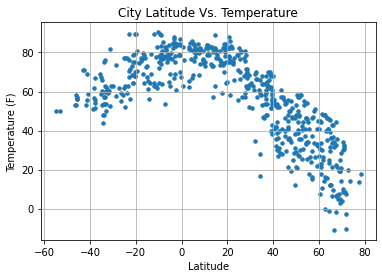

In [27]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Temperature (F)"], marker="o", s=12)
plt.title("City Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

plt.savefig("Output/City Latitude Vs. Temperature.png")
plt.show()


## Latitude vs. Humidity Plot

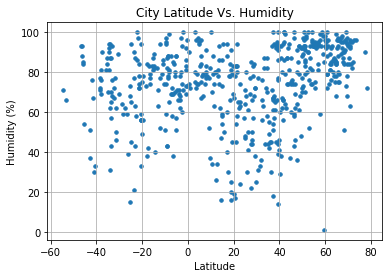

In [28]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity (%)"], marker="o", s=12)
plt.title("City Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Output/City Latitude Vs. Humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

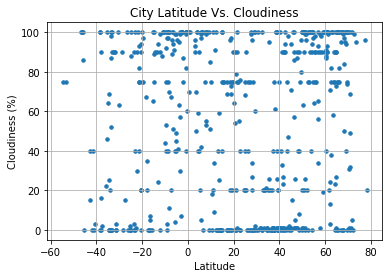

In [30]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness (%)"], marker="o", s=12)
plt.title("City Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Output/City Latitude Vs. Cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

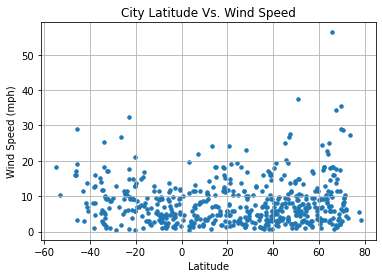

In [32]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed (mph)"], marker="o", s=12)
plt.title("City Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Output/City Latitude Vs. Wind Speed.png")
plt.show()


## Linear Regression

In [34]:
#Seperate Northern and Southern Hemisphere Data
north_hemi_df = weather_data_df.loc[weather_data_df["Latitude"] > 0]
south_hemi_df = weather_data_df.loc[weather_data_df["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8664577973116424


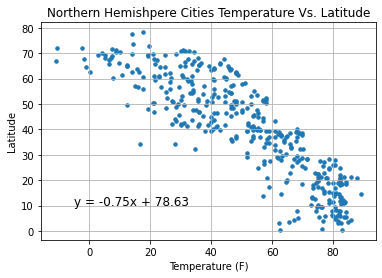

In [38]:
temp=north_hemi_df["Temperature (F)"].values
lat=north_hemi_df["Latitude"].values

slope, intercept, r_value, p_value, stderr = st.linregress(temp, lat)
regress_values = temp * slope + intercept

plt.scatter(temp, lat, marker="o", s=12)

print(f"The r-value is: {r_value}")
      
plt.title("Northern Hemishpere Cities Temperature Vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)
      
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(-5,10),size=12)
plt.savefig("Output/Northern Hemishpere Cities Temperature Vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6743878321805263


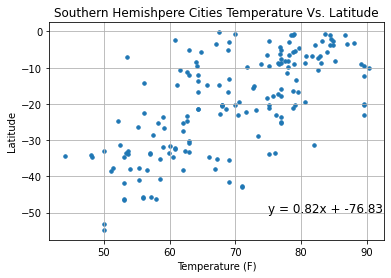

In [40]:
temp=south_hemi_df["Temperature (F)"]
lat=south_hemi_df["Latitude"]

slope, intercept, r_value, p_value, stderr = st.linregress(temp, lat)
regress_values = temp * slope + intercept

plt.scatter(temp, lat, marker="o", s=12)

print(f"The r-value is: {r_value}")
      
plt.title("Southern Hemishpere Cities Temperature Vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)
      
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(75,-50),size=12)
plt.savefig("Output/Southern Hemishpere Cities Temperature Vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3493199783669718


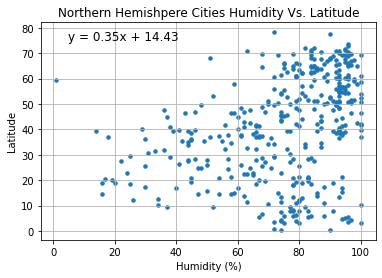

In [41]:
humid=north_hemi_df["Humidity (%)"]
lat=north_hemi_df["Latitude"]

slope, intercept, r_value, p_value, stderr = st.linregress(humid, lat)
regress_values = humid * slope + intercept

plt.scatter(humid, lat, marker="o", s=12)

print(f"The r-value is: {r_value}")
      
plt.title("Northern Hemishpere Cities Humidity Vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid(True)
      
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(5,75),size=12)
plt.savefig("Output/Northern Hemishpere Cities Humidity Vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1302278987871522


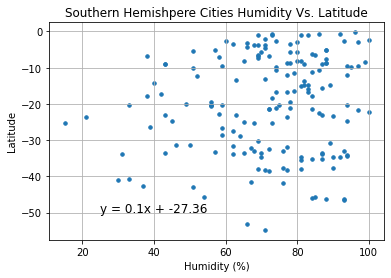

In [42]:
humid=south_hemi_df["Humidity (%)"]
lat=south_hemi_df["Latitude"]

slope, intercept, r_value, p_value, stderr = st.linregress(humid, lat)
regress_values = humid * slope + intercept

plt.scatter(humid, lat, marker="o", s=12)

print(f"The r-value is: {r_value}")
      
plt.title("Southern Hemishpere Cities Humidity Vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid(True)
      
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(25,-50),size=12)
plt.savefig("Output/Southern Hemishpere Cities Humidity Vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15774181785207303


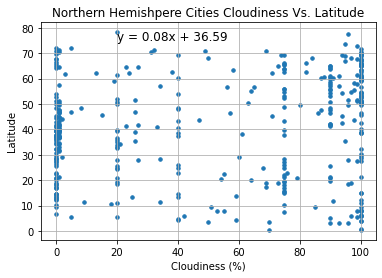

In [43]:
cloud=north_hemi_df["Cloudiness (%)"]
lat=north_hemi_df["Latitude"]

slope, intercept, r_value, p_value, stderr = st.linregress(cloud, lat)
regress_values = cloud * slope + intercept

plt.scatter(cloud, lat, marker="o", s=12)

print(f"The r-value is: {r_value}")
      
plt.title("Northern Hemishpere Cities Cloudiness Vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)
      
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(20,75),size=12)
plt.savefig("Output/Northern Hemishpere Cities Cloudiness Vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.25332519540273574


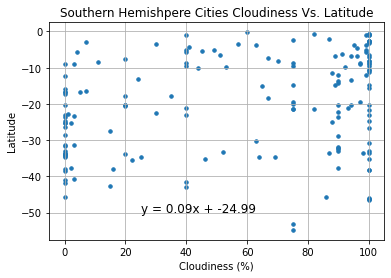

In [45]:
cloud=south_hemi_df["Cloudiness (%)"]
lat=south_hemi_df["Latitude"]

slope, intercept, r_value, p_value, stderr = st.linregress(cloud, lat)
regress_values = cloud * slope + intercept

plt.scatter(cloud, lat, marker="o", s=12)

print(f"The r-value is: {r_value}")
      
plt.title("Southern Hemishpere Cities Cloudiness Vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)
      
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(25,-50),size=12)
plt.savefig("Output/Southern Hemishpere Cities Cloudiness Vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12746154002390186


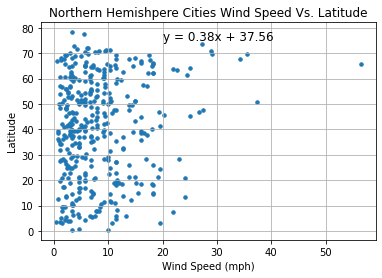

In [46]:
wind=north_hemi_df["Wind Speed (mph)"]
lat=north_hemi_df["Latitude"]

slope, intercept, r_value, p_value, stderr = st.linregress(wind, lat)
regress_values = wind * slope + intercept

plt.scatter(wind, lat, marker="o", s=12)

print(f"The r-value is: {r_value}")
      
plt.title("Northern Hemishpere Cities Wind Speed Vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid(True)
      
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(20,75),size=12)
plt.savefig("Output/Northern Hemishpere Cities Wind Speed Vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3466028139488911


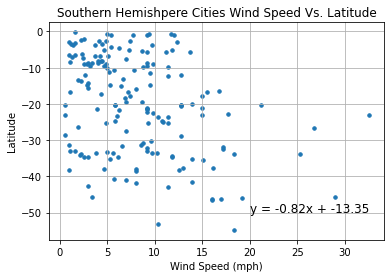

In [47]:
wind=south_hemi_df["Wind Speed (mph)"]
lat=south_hemi_df["Latitude"]

slope, intercept, r_value, p_value, stderr = st.linregress(wind, lat)
regress_values = wind * slope + intercept

plt.scatter(wind, lat, marker="o", s=12)

print(f"The r-value is: {r_value}")
      
plt.title("Southern Hemishpere Cities Wind Speed Vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid(True)
      
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(20,-50),size=12)
plt.savefig("Output/Southern Hemishpere Cities Wind Speed Vs. Latitude.png")
plt.show()